In [1]:
from math import exp, sqrt, log
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

from dictances import jensen_shannon
import matplotlib.pyplot as plt
from pydiffmap import diffusion_map as dm
from pydiffmap.visualization import embedding_plot, data_plot

from ref.Diffusion_Maps import diffusionMapping
from ref.Shir import utils as shir_utils
from utils import min_max_scaler
from utils import calc_mean_std, flatten, norm_by_dist_type, calculateDistance
from main import execute_distance_func, calc_dist, export_heatmaps

https://archive.ics.uci.edu/ml/datasets/Crop+mapping+using+fused+optical-radar+data+set#

In [ ]:
pd.set_option('display.max_columns', None)
df_winnipeg = pd.read_csv('ref/Shir/Data/WinnipegDataset.csv')

# Feature HeatMaps w/ distance normalization

In [3]:
features = df_winnipeg.columns.drop('label')
df_norm = min_max_scaler(df_winnipeg, features)

export_heatmaps(df_norm, features, 'wasserstein_dist', 'hellinger_dist', False)

export_heatmaps(df_norm, features, 'wasserstein_dist', 'jensen_shannon_dist', False)

export_heatmaps(df_norm, features, 'jm_dist', 'hellinger_dist', False)

export_heatmaps(df_norm, features, 'bhattacharyya_dist', 'hellinger_dist', False)

In [4]:
df_dists_wasser, dist_dict_wasser = calc_dist('wasserstein_dist', df_norm, 'label')
df_dists_wasser.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0.0,0.028612,0.037282,0.302447,0.205160,0.242698,0.104148,0.028612,0.0,0.046731,0.313934,0.216660,0.254262,0.092667,0.037282,0.046731,0.0,0.267539,0.170253,0.207711,0.139054,0.302447,0.313934,0.267539,0.0,0.097287,0.059855,0.406593,0.205160,0.216660,0.170253,0.097287,0.0,0.037824,0.309307,0.242698,0.254262,0.207711,0.059855,0.037824,0.0,0.346738,0.104148,0.092667,0.139054,0.406593,0.309307,0.346738,0.0
1,0.0,0.106657,0.069268,0.347663,0.248771,0.285015,0.157605,0.106657,0.0,0.174665,0.454313,0.355422,0.391667,0.050955,0.069268,0.174665,0.0,0.279650,0.180759,0.217002,0.225619,0.347663,0.454313,0.279650,0.0,0.098893,0.062660,0.505268,0.248771,0.355422,0.180759,0.098893,0.0,0.036250,0.406375,0.285015,0.391667,0.217002,0.062660,0.036250,0.0,0.442608,0.157605,0.050955,0.225619,0.505268,0.406375,0.442608,0.0
2,0.0,0.040527,0.170812,0.325102,0.302279,0.332424,0.028372,0.040527,0.0,0.140805,0.296027,0.273181,0.303373,0.045232,0.170812,0.140805,0.0,0.155472,0.132650,0.162805,0.185761,0.325102,0.296027,0.155472,0.0,0.022924,0.014444,0.341234,0.302279,0.273181,0.132650,0.022924,0.0,0.030235,0.318411,0.332424,0.303373,0.162805,0.014444,0.030235,0.0,0.348552,0.028372,0.045232,0.185761,0.341234,0.318411,0.348552,0.0
3,0.0,0.039193,0.113648,0.312773,0.284192,0.295440,0.047206,0.039193,0.0,0.080646,0.280175,0.251598,0.262932,0.079816,0.113648,0.080646,0.0,0.199988,0.171407,0.182651,0.159990,0.312773,0.280175,0.199988,0.0,0.034964,0.024018,0.359979,0.284192,0.251598,0.171407,0.034964,0.0,0.013713,0.331397,0.295440,0.262932,0.182651,0.024018,0.013713,0.0,0.342625,0.047206,0.079816,0.159990,0.359979,0.331397,0.342625,0.0
4,0.0,0.037990,0.090428,0.362225,0.247101,0.307946,0.104993,0.037990,0.0,0.124301,0.398344,0.283212,0.344056,0.068875,0.090428,0.124301,0.0,0.274137,0.159005,0.219774,0.193082,0.362225,0.398344,0.274137,0.0,0.115134,0.054364,0.467219,0.247101,0.283212,0.159005,0.115134,0.0,0.061903,0.352087,0.307946,0.344056,0.219774,0.054364,0.061903,0.0,0.412855,0.104993,0.068875,0.193082,0.467219,0.352087,0.412855,0.0
5,0.0,0.035037,0.106992,0.298463,0.293093,0.293299,0.045544,0.035037,0.0,0.079624,0.271745,0.266382,0.266661,0.072273,0.106992,0.079624,0.0,0.192445,0.187074,0.187277,0.151562,0.298463,0.271745,0.192445,0.0,0.023096,0.023200,0.344007,0.293093,0.266382,0.187074,0.023096,0.0,0.006353,0.338637,0.293299,0.266661,0.187277,0.023200,0.006353,0.0,0.338821,0.045544,0.072273,0.151562,0.344007,0.338637,0.338821,0.0
6,0.0,0.099067,0.253008,0.030926,0.152173,0.132264,0.187843,0.099067,0.0,0.172886,0.090922,0.072963,0.060947,0.107729,0.253008,0.172886,0.0,0.263172,0.102761,0.123289,0.078409,0.030926,0.090922,0.263172,0.0,0.160550,0.139886,0.198012,0.152173,0.072963,0.102761,0.160550,0.0,0.020678,0.042959,0.132264,0.060947,0.123289,0.139886,0.020678,0.0,0.058135,0.187843,0.107729,0.078409,0.198012,0.042959,0.058135,0.0
7,0.0,0.167299,0.058633,0.083636,0.079467,0.080683,0.101417,0.167299,0.0,0.225933,0.250935,0.246758,0.245726,0.072928,0.058633,0.225933,0.0,0.025179,0.022313,0.032762,0.155585,0.083636,0.250935,0.025179,0.0,0.021472,0.021915,0.179666,0.079467,0.246758,0.022313,0.021472,0.0,0.020284,0.174793,0.080683,0.245726,0.032762,0.021915,0.020284,0.0,0.173218,0.101417,0.072928,0.155585,0.179666,0.174793,0.173218,0.0
8,0.0,0.227441,0.147045,0.089618,0.049811,0.033305,0.244322,0.227441,0.0,0.085623,0.317040,0.183553,0.200478,0.018480,0.147045,0.085623,0.0,0.236634,0.103041,0.118571,0.097278,0.089618,0.317040,0.236634,0.0,0.133594,0.118451,0.333912,0.049811,0.183553,0.103041,0.133594,0.0,0.028829,0.200318,0.033305,0.200478,0.118571,0.118451,0.028829,0.0,0.215461,0.244322,0.018480,0.097278,0.333912,0.200318,0.215461,0.0
9,0.0,0.036297,0.038056,0.078693,0.033473,0.024834,0.017110,0.036297,0.0,0.012275,0.064600,0.067423,0.042448,0.034409,0.038056,0.012275,0.0,0.053000,0.068612,0.039901,0.040308,0.078693,0.064

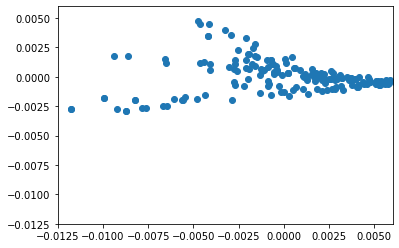

In [5]:
eps_type='maxmin'#mean' #or maxmin
alpha=1
vec_wasser, egs_wasser, coordinates_wasser, dataList_wasser, epsilon_wasser = (
diffusionMapping(df_dists_wasser, alpha, eps_type, 8, 1, dim=2)
)

plt.xlim(-0.0125, 0.006)
plt.ylim(-0.0125, 0.006)
plt.scatter(coordinates_wasser[0], coordinates_wasser[1])

In [6]:
dists = []
for index1, row1 in df_coordinates_wasser.iterrows():
    dists2 = [calculateDistance(row1, row2) for index2, row2 in df_coordinates_wasser.iterrows()]
    dists.append(dists2)
df_DM_dists_wasser = pd.DataFrame(dists)
df_DM_dists_wasser.head(10)

NameError: name 'df_coordinates_wasser' is not defined

In [ ]:
df_dists_jm, dist_dict_jm = calc_dist('jm_dist', df_norm, 'label')
df_dists_jm.head(10)

In [ ]:
eps_type='maxmin'#mean' #or maxmin
alpha=1
vec_jm, egs_jm, coordinates_jm, dataList_jm, epsilon_jm = diffusionMapping(df_dists_jm, alpha, eps_type, 4, 1, dim=2)

In [ ]:
dists = []
for index1, row1 in df_coordinates_jm.iterrows():
    dists2 = [calculateDistance(row1, row2) for index2, row2 in df_coordinates_jm.iterrows()]
    dists.append(dists2)
df_DM_dists_jm = pd.DataFrame(dists)
df_DM_dists_jm.head(10)

In [22]:
neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
mydmap = dm.DiffusionMap.from_sklearn(n_evecs = 2, epsilon = 1.0, alpha = 0.5, k=16)
dmap = mydmap.fit_transform(df_norm)

C:\Users\OmerHedvat\anaconda3\lib\site-packages\pydiffmap\diffusion_map.py:159: RuntimeWarning: invalid value encountered in sqrt
  dmap = np.dot(evecs, np.diag(np.sqrt(-1. / evals)))


<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
C:\Users\OmerHedvat\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


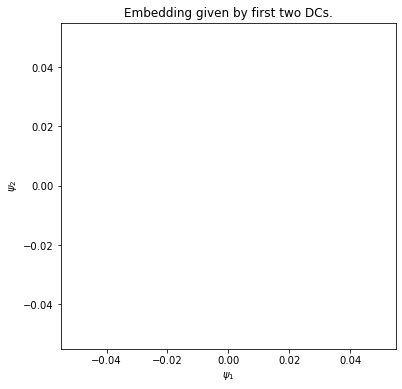

TypeError: '(slice(None, None, None), 0)' is an invalid key

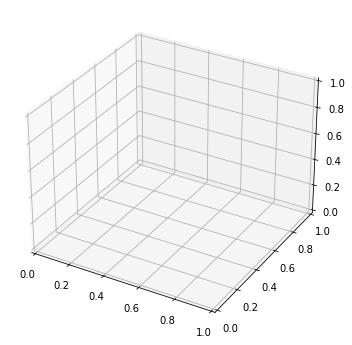

In [23]:
embedding_plot(mydmap, scatter_kwargs = {'c': dmap[:,0], 'cmap': 'Spectral'}) 
data_plot(mydmap, dim=3, scatter_kwargs = {'cmap': 'Spectral'}) 
plt.show()

### PreProcess
Normalize the data

### Add Heatmap for each feature + heat scala

### 1st step - Embedding 
Over the feature matrix (6x6 / 4x4 / 3x3) - CNN
Over the feature row (1x36) - AutoEncoder
Over the flatenned matrix -  Random Projections / DM

### 2nd step - Diffusion Maps
DM over the encoded matrix (9x36-->9x2 for example)
DM from https://datafold-dev.gitlab.io/datafold/intro.html

### 3rd step - plot

